  0%|          | 0/4 [00:00<?, ?it/s]

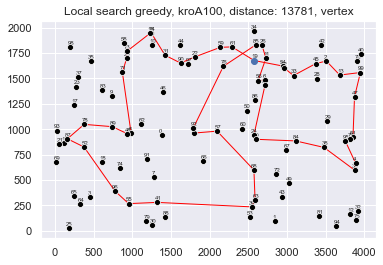

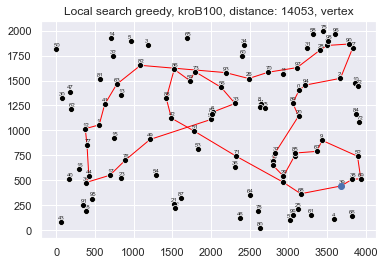

 25%|██▌       | 1/4 [06:45<20:17, 405.73s/it]

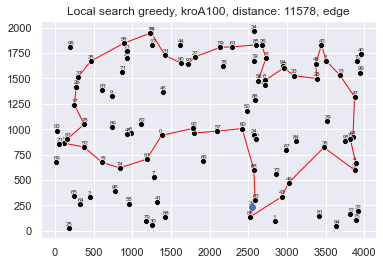

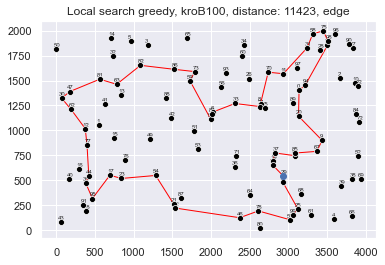

 50%|█████     | 2/4 [09:40<11:13, 336.54s/it]

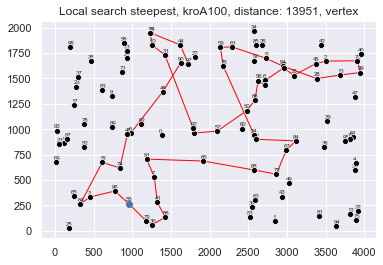

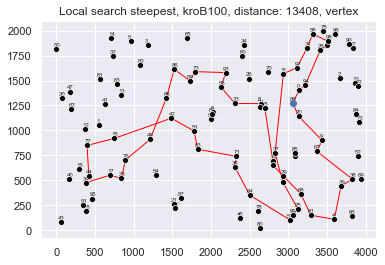

 75%|███████▌  | 3/4 [12:28<04:45, 285.86s/it]

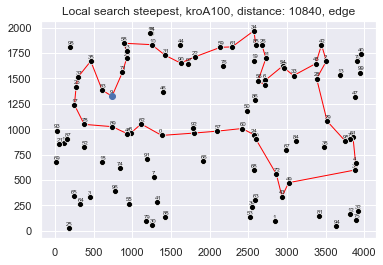

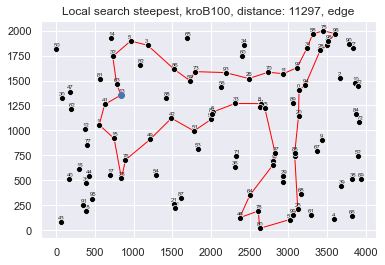

100%|██████████| 4/4 [14:29<00:00, 236.50s/it]

100%|██████████| 4/4 [14:29<00:00, 217.43s/it]

,version,neigbourhood,instance,cost,time
0,greedy,vertex,kroA100,16717,2.132295
0,greedy,vertex,kroA100,18781,1.213755
0,greedy,vertex,kroA100,16566,1.646594
0,greedy,vertex,kroA100,13781,2.222095
0,greedy,vertex,kroA100,16218,1.148890


In [3]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['version', 'neigbourhood','instance', 'cost', 'time'])
for version, neighbourhood in tqdm(list(product(['greedy', 'steepest'], ['vertex', 'edge']))):
    for instance_name in ['kroA100', 'kroB100']:
        instance = Instance(name=instance_name)
        solve_strategy: LocalSearch = LocalSearch(
            instance=instance,
            version=version,
            neighbourhood=neighbourhood,
        )
        solve_strategy.run(run_times=100)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[version, neighbourhood,instance_name, cost, time]],columns=['version', 'neigbourhood','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'Local search {version}, {instance.name}, distance: {solve_strategy.solution_cost}, {neighbourhood}',
            save_file_name=f'{instance.name}_{min(costs)}_{version}_{neighbourhood}.png'
        )
df.head()

In [2]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   version       800 non-null    object 
 1   neigbourhood  800 non-null    object 
 2   instance      800 non-null    object 
 3   cost          800 non-null    float64
 4   time          800 non-null    float64
dtypes: float64(2), object(3)
memory usage: 37.5+ KB


In [3]:
df_cost = df.groupby(['instance', 'version']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                     min   mean    max
instance version                      
kroA100  greedy    11578  15222  21787
         steepest  10840  15114  24747
kroB100  greedy    11423  15178  22226
         steepest  11297  15073  21989

In [4]:
df_cost = df.groupby(['instance','version','neigbourhood']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                                  min   mean    max
instance version  neigbourhood                     
kroA100  greedy   edge          11578  12908  14372
                  vertex        13781  17537  21787
         steepest edge          10840  12542  14096
                  vertex        13951  17685  24747
kroB100  greedy   edge          11423  12753  15844
                  vertex        14053  17603  22226
         steepest edge          11297  12477  15167
                  vertex        13408  17669  21989

In [5]:
df_time = df.groupby(['instance','version','neigbourhood']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time              
                                  min   mean    max
instance version  neigbourhood                     
kroA100  greedy   edge          0.163  0.322  0.607
                  vertex        0.334  0.718  1.226
         steepest edge          0.151  0.200  0.299
                  vertex        0.209  0.313  0.475
kroB100  greedy   edge          0.179  0.319  0.507
                  vertex        0.410  0.765  1.368
         steepest edge          0.152  0.209  0.407
                  vertex        0.206  0.302  0.476

In [6]:
print(df_cost.to_latex())

\begin{tabular}{lllrrr}
\toprule
        &          &        & \multicolumn{3}{l}{cost} \\
        &          &        &    min &   mean &    max \\
instance & version & neigbourhood &        &        &        \\
\midrule
kroA100 & greedy & edge &  11578 &  12908 &  14372 \\
        &          & vertex &  13781 &  17537 &  21787 \\
        & steepest & edge &  10840 &  12542 &  14096 \\
        &          & vertex &  13951 &  17685 &  24747 \\
kroB100 & greedy & edge &  11423 &  12753 &  15844 \\
        &          & vertex &  14053 &  17603 &  22226 \\
        & steepest & edge &  11297 &  12477 &  15167 \\
        &          & vertex &  13408 &  17669 &  21989 \\
\bottomrule
\end{tabular}



In [7]:
print(df_time.to_latex())

\begin{tabular}{lllrrr}
\toprule
        &          &        & \multicolumn{3}{l}{time} \\
        &          &        &    min &   mean &    max \\
instance & version & neigbourhood &        &        &        \\
\midrule
kroA100 & greedy & edge &  0.163 &  0.322 &  0.607 \\
        &          & vertex &  0.334 &  0.718 &  1.226 \\
        & steepest & edge &  0.151 &  0.200 &  0.299 \\
        &          & vertex &  0.209 &  0.313 &  0.475 \\
kroB100 & greedy & edge &  0.179 &  0.319 &  0.507 \\
        &          & vertex &  0.410 &  0.765 &  1.368 \\
        & steepest & edge &  0.152 &  0.209 &  0.407 \\
        &          & vertex &  0.206 &  0.302 &  0.476 \\
\bottomrule
\end{tabular}

